In [1]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
analysis = scripts.Analysis()

In [3]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'o3',
                          'band05_wn_980_1100',
                          'P_1_T_250_min_2e-22_max_5e-17_ng_20_dlogN_uniform__P_50_T_250_min_1e-20_max_5e-18_ng_20_dlogN_uniform',
                          'ighigh_7',
                          'wgt_1_1_1_1_1_1_1_.7_.7_.7_.7_.7_.7_.7_.7_.7_.7_.7_.7',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [4]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'o3',
                               'band05_wn_980_1100',
                               'P_1_T_250_min_2e-22_max_5e-17_ng_20_dlogN_uniform__P_50_T_250_min_1e-20_max_5e-18_ng_20_dlogN_uniform',
                               'ighigh_7',
                               'wgt_1_1_1_1_1_1_1_.7_.7_.7_.7_.7_.7_.7_.7_.7_.7_.7_.7',
                               'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [5]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 20 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [6]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [7]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [8]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [9]:
fig.display_hrefanchor()

In [10]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [11]:
table_dgdgs.display_hrefanchor()

In [12]:
for g in range(1, 20 + 1):
    s = 'Table: cooling rate. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

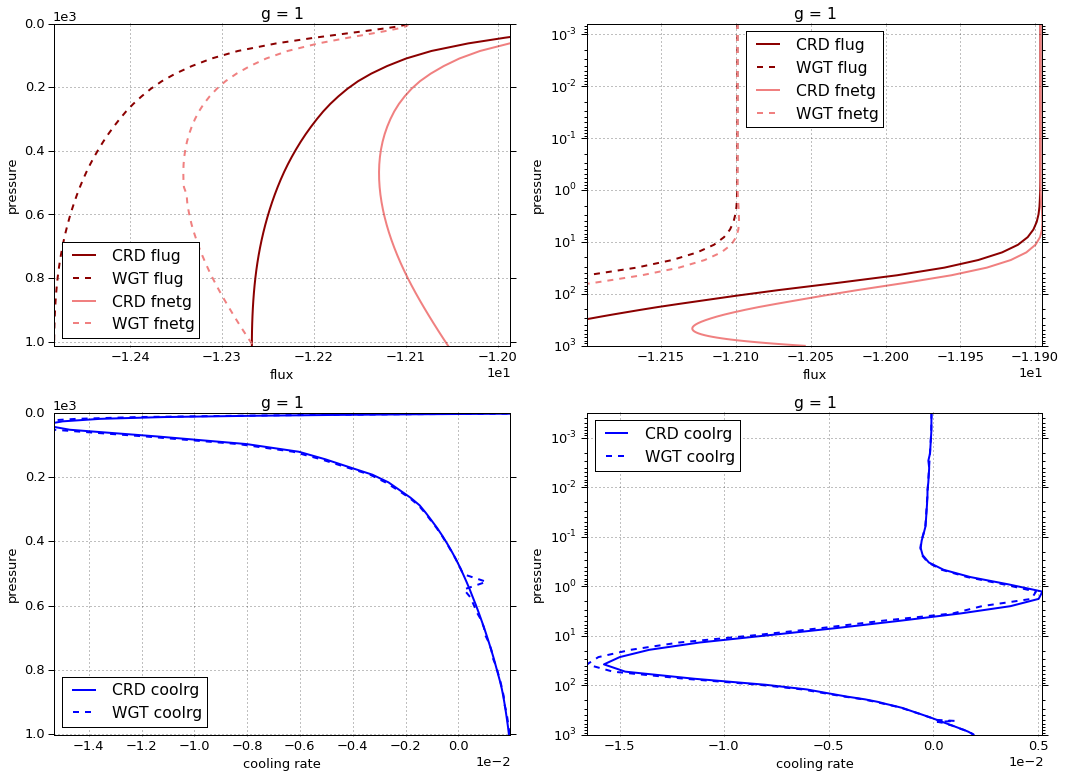

# Figure: flux, cooling rate. g-group 2

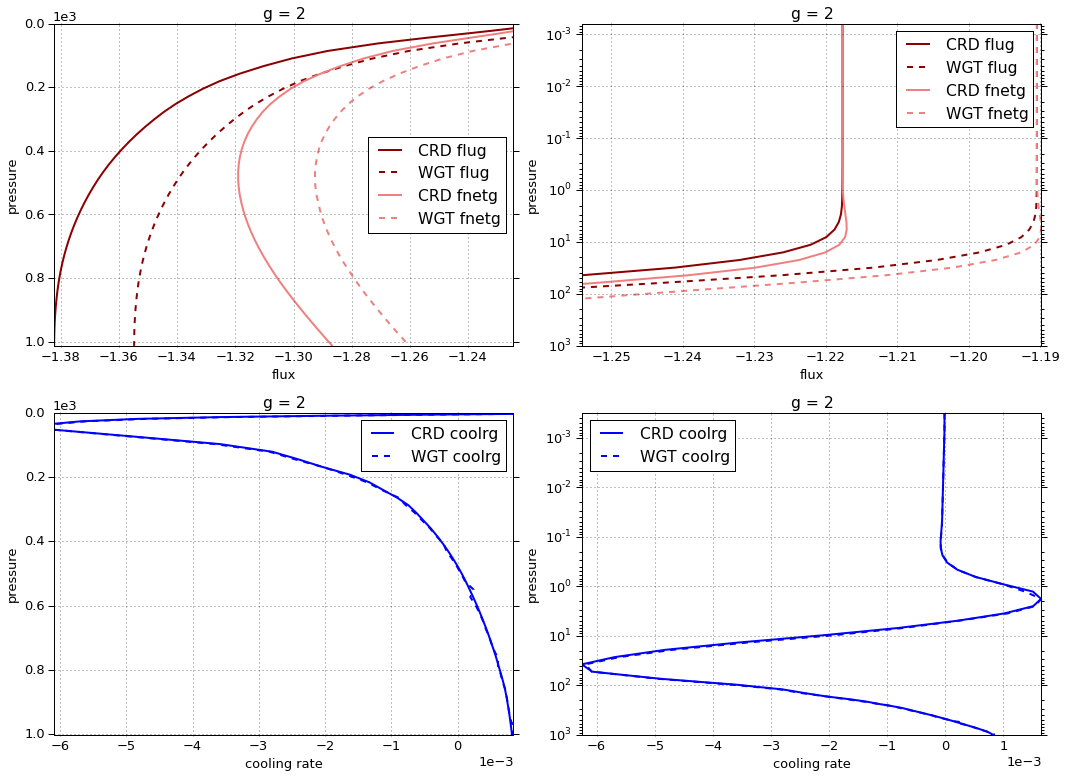

# Figure: flux, cooling rate. g-group 3

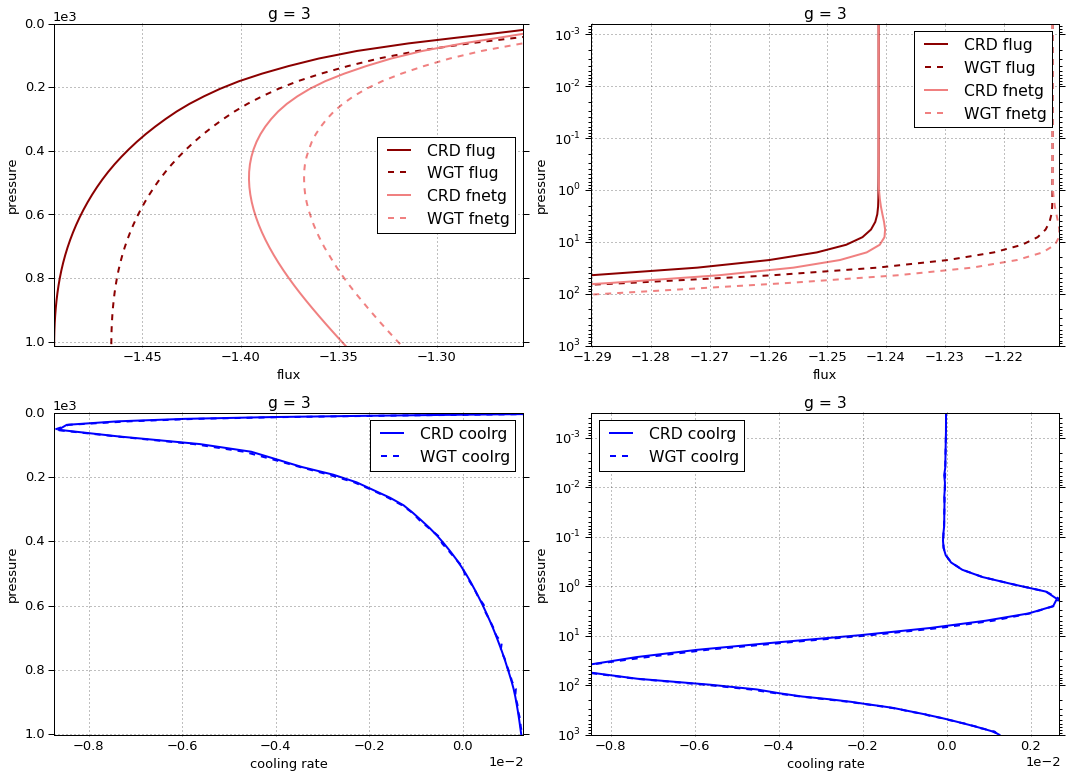

# Figure: flux, cooling rate. g-group 4

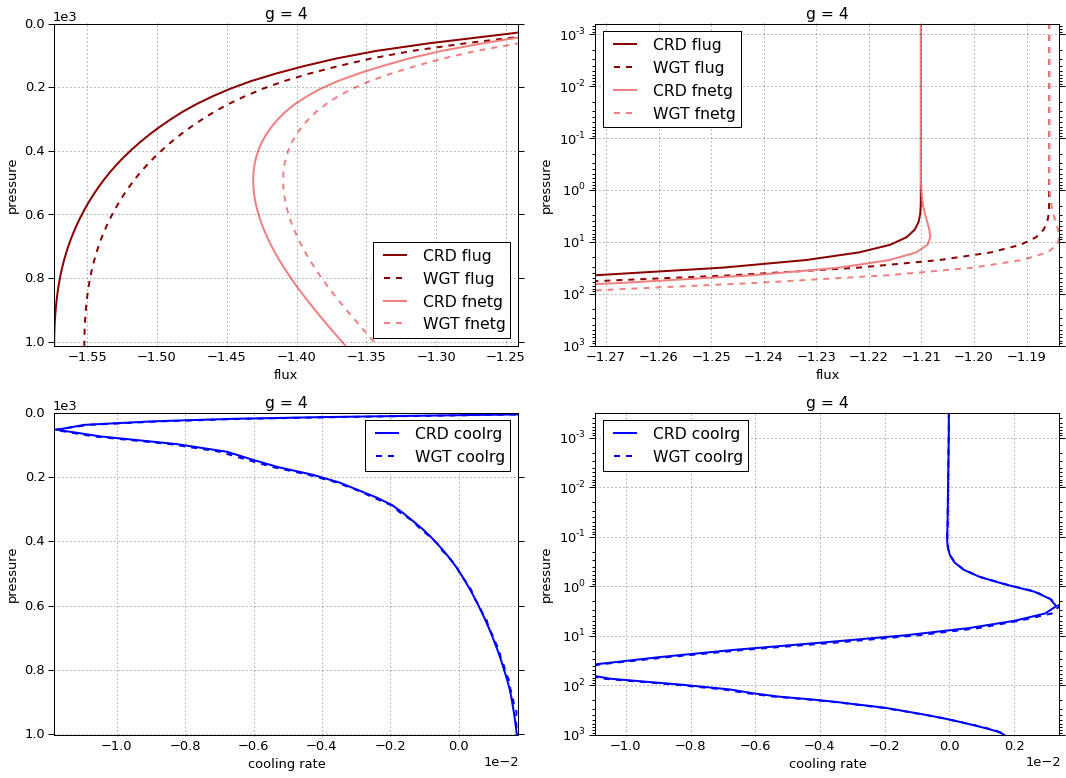

# Figure: flux, cooling rate. g-group 5

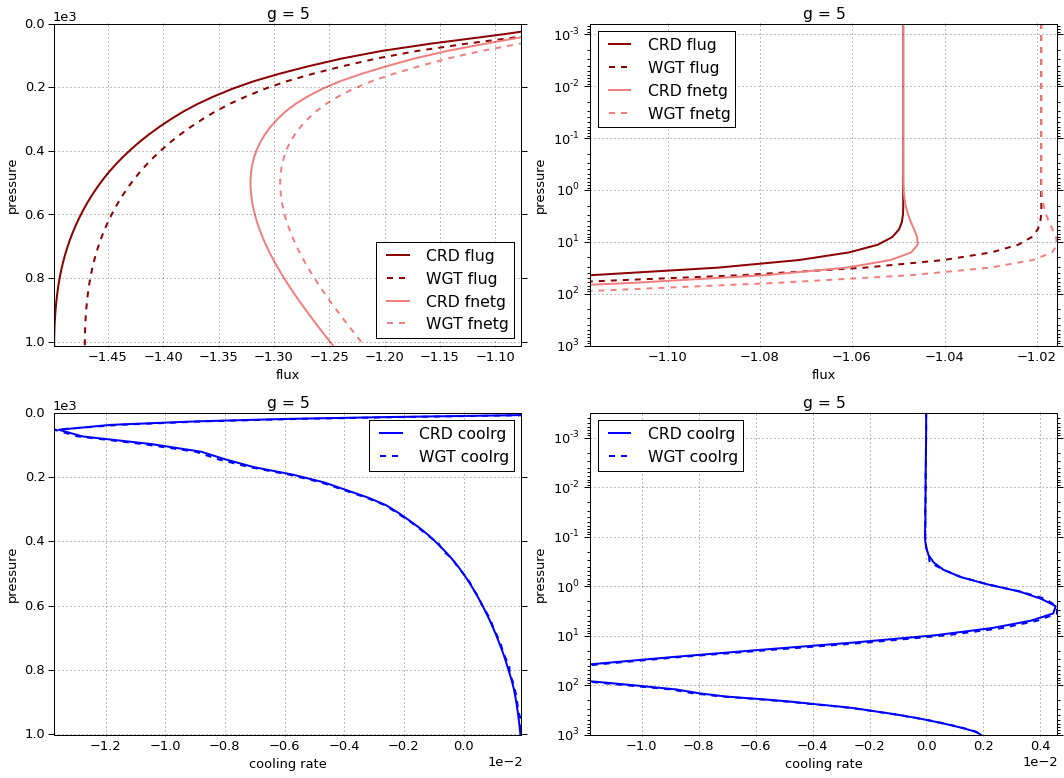

# Figure: flux, cooling rate. g-group 6

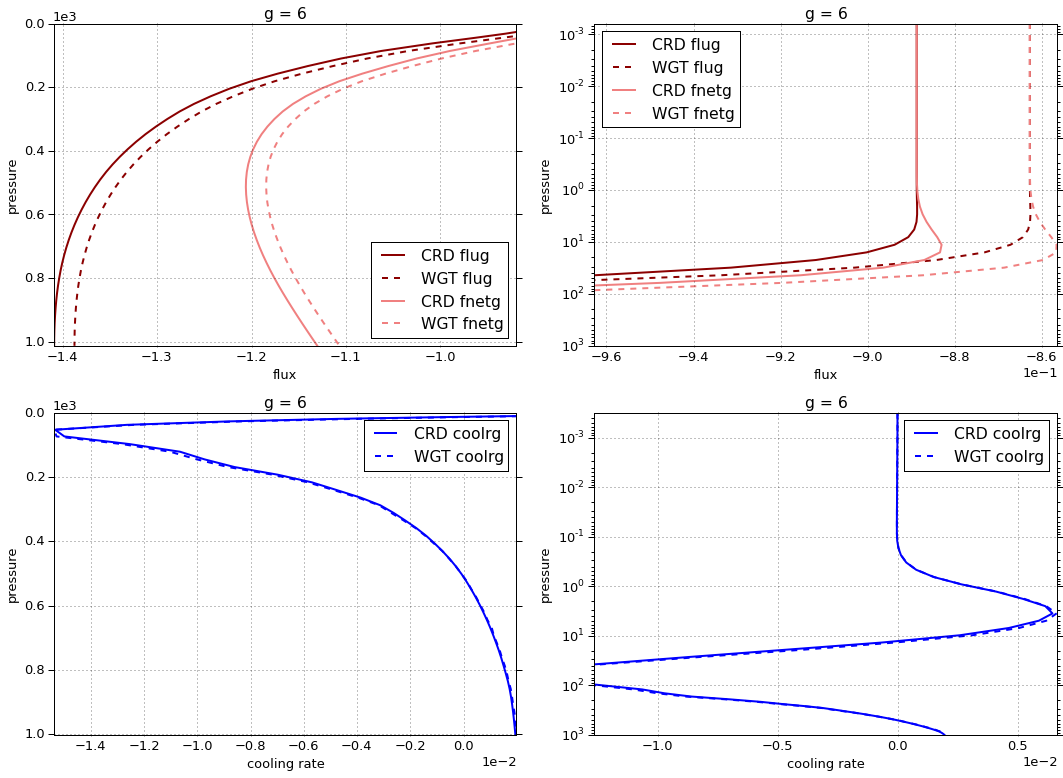

# Figure: flux, cooling rate. g-group 7

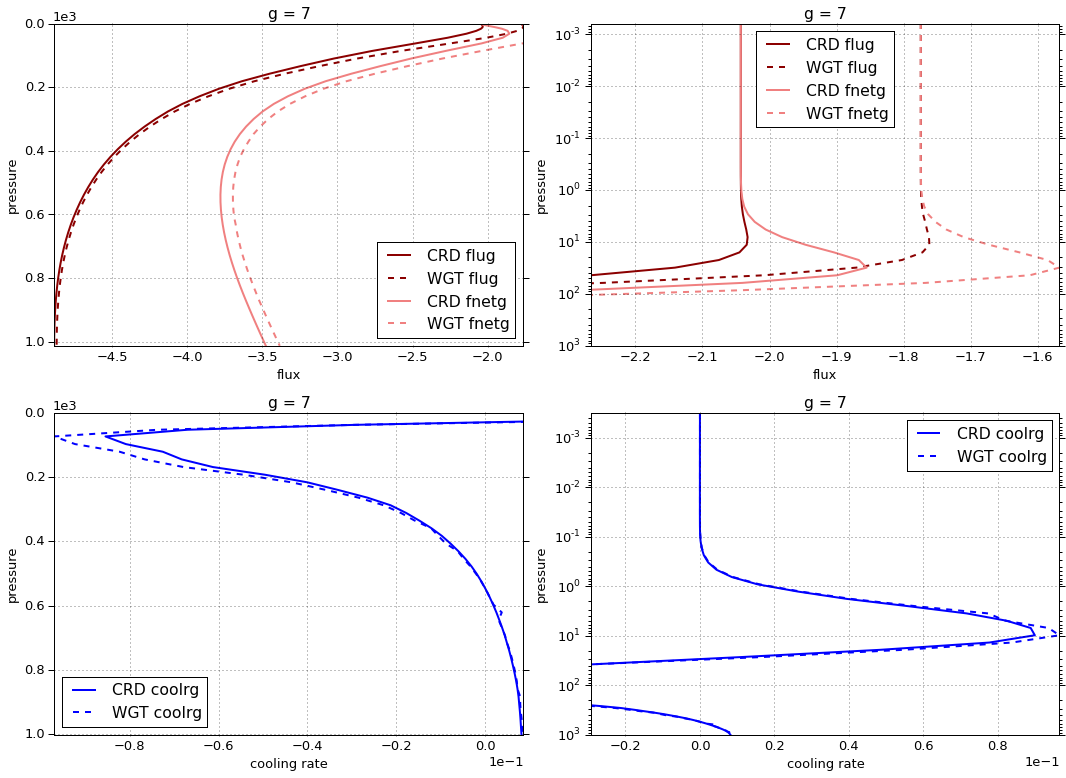

# Figure: flux, cooling rate. g-group 8

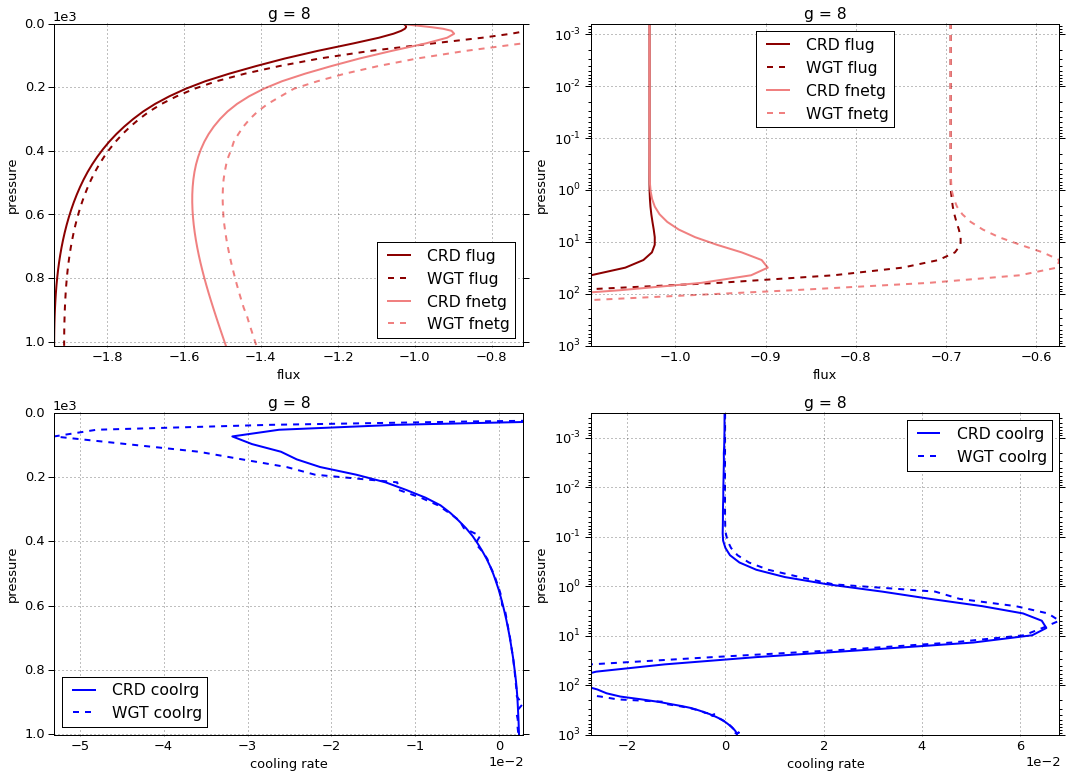

# Figure: flux, cooling rate. g-group 9

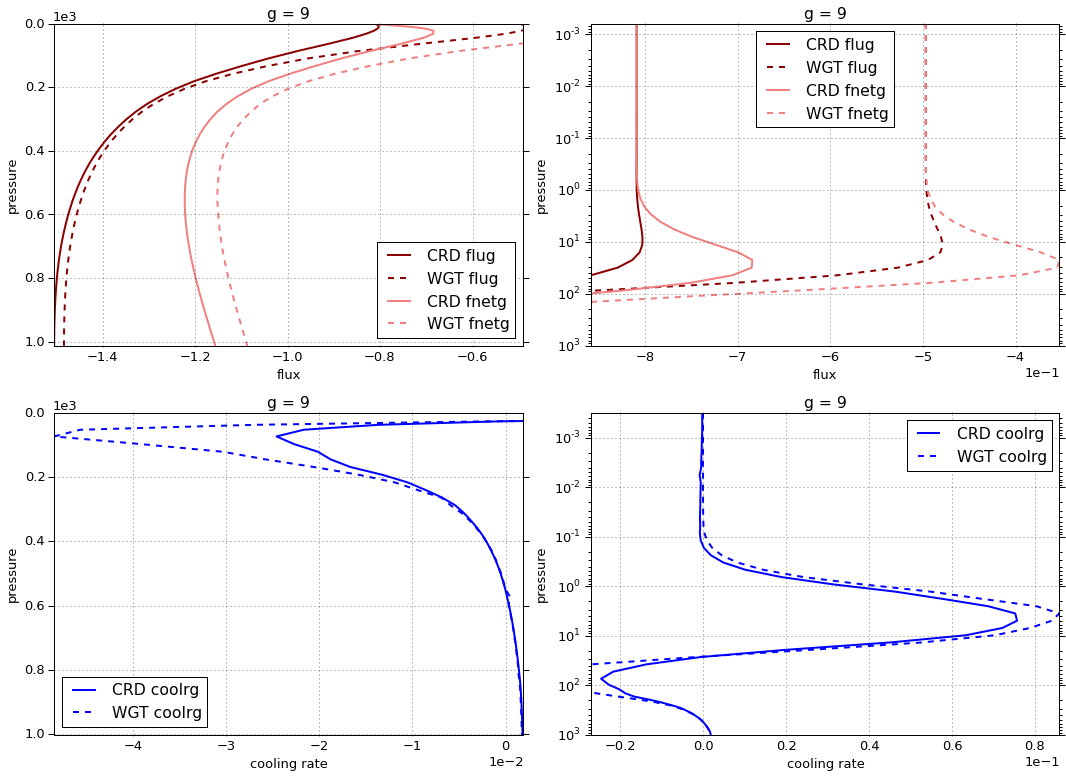

# Figure: flux, cooling rate. g-group 10

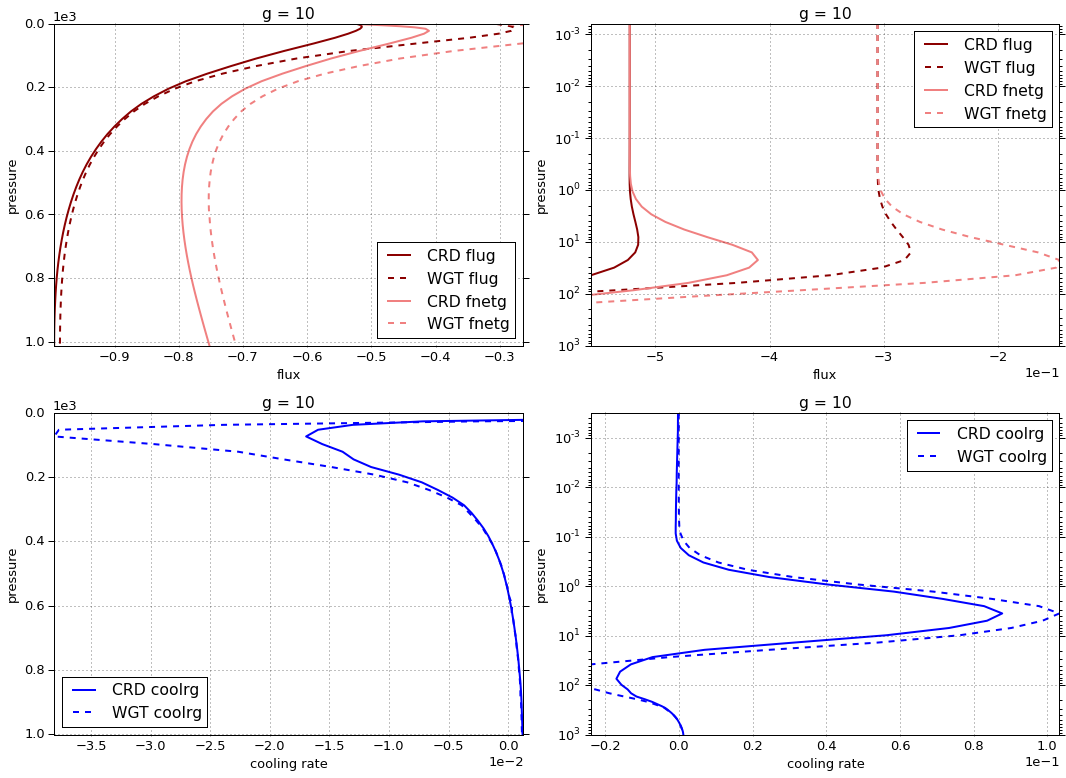

# Figure: flux, cooling rate. g-group 11

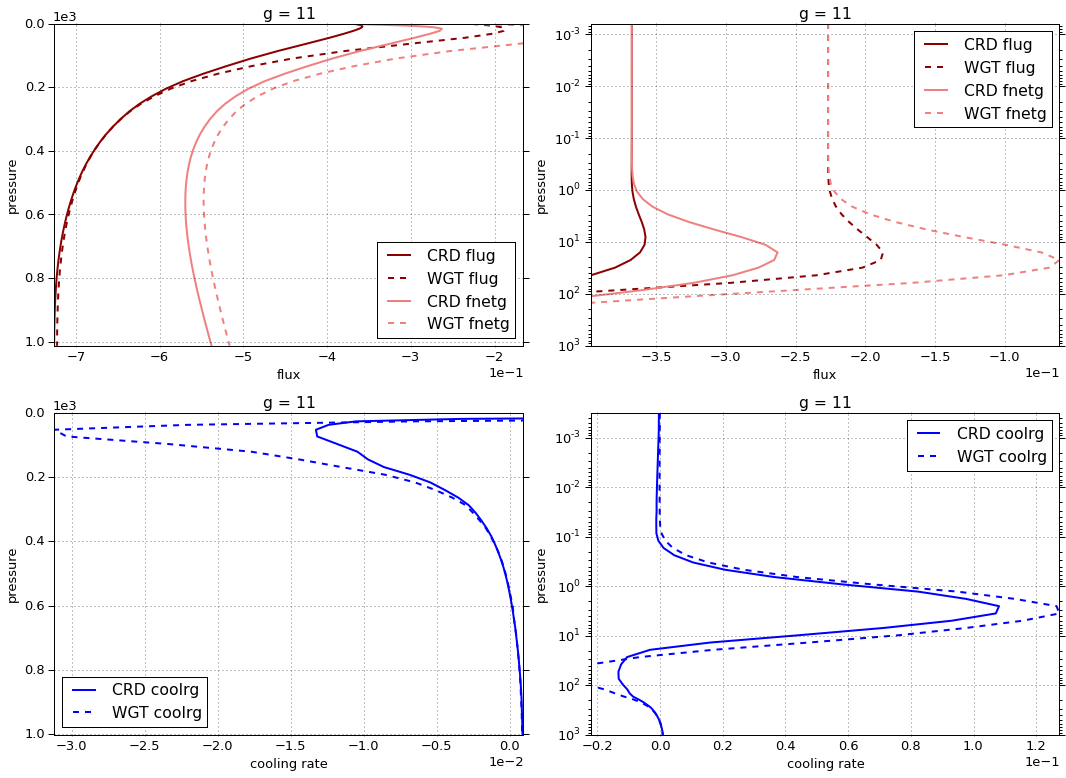

# Figure: flux, cooling rate. g-group 12

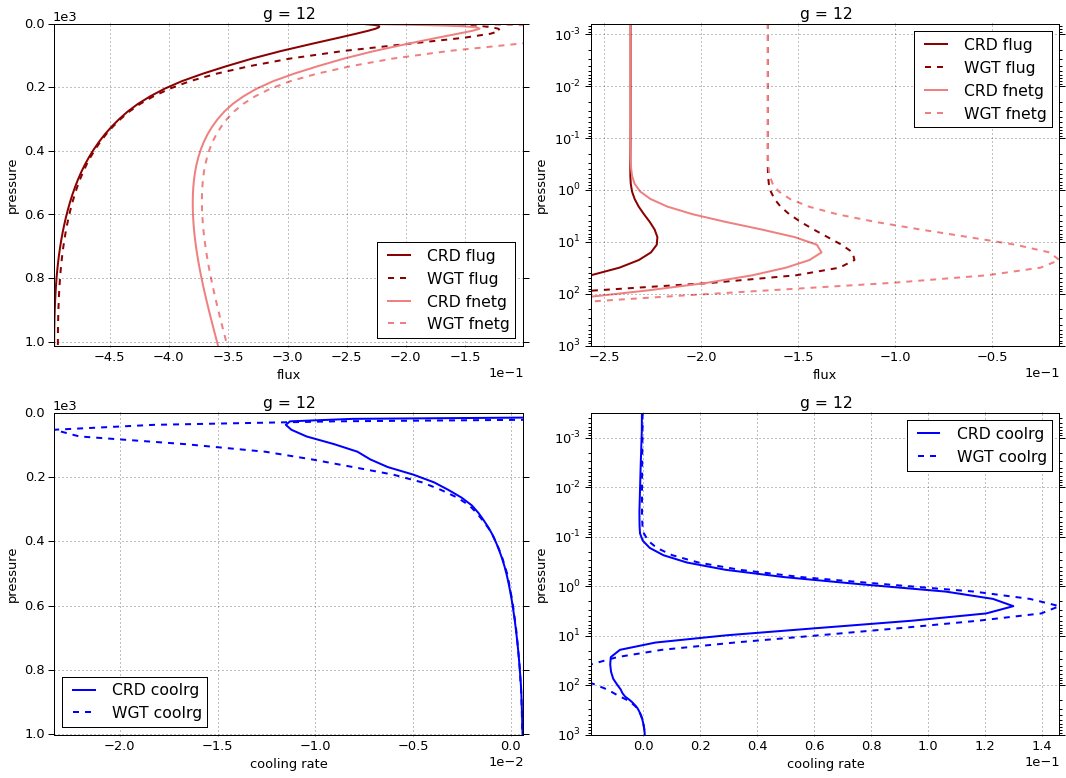

# Figure: flux, cooling rate. g-group 13

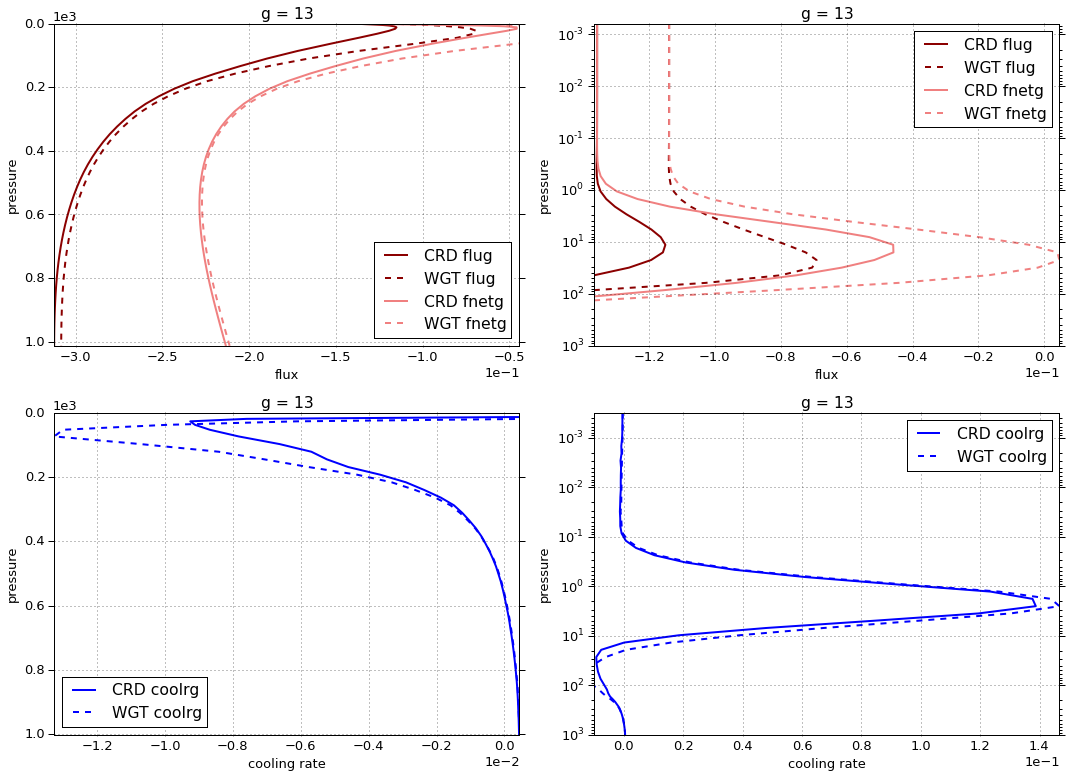

# Figure: flux, cooling rate. g-group 14

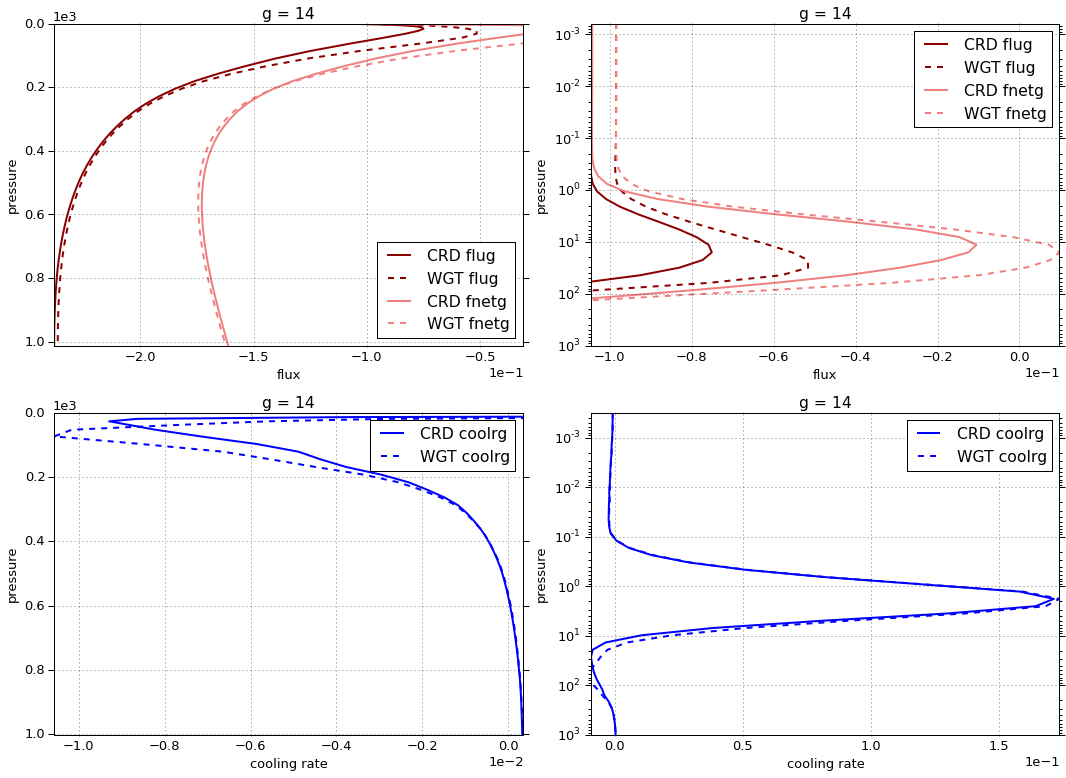

# Figure: flux, cooling rate. g-group 15

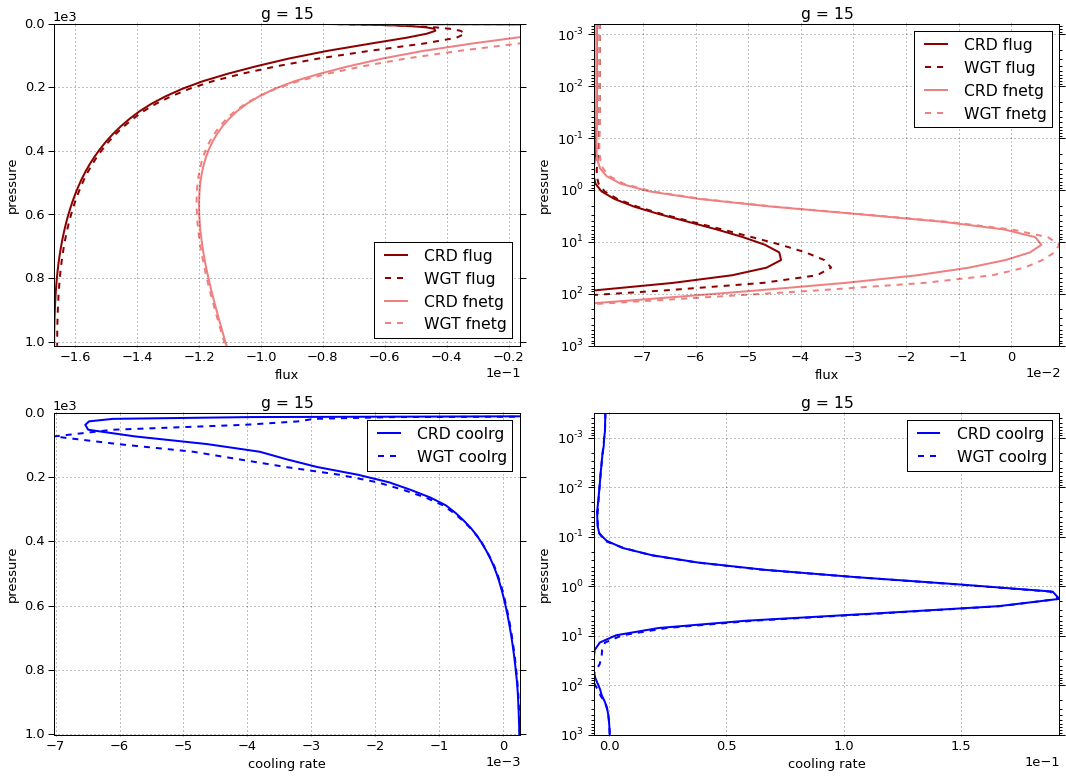

# Figure: flux, cooling rate. g-group 16

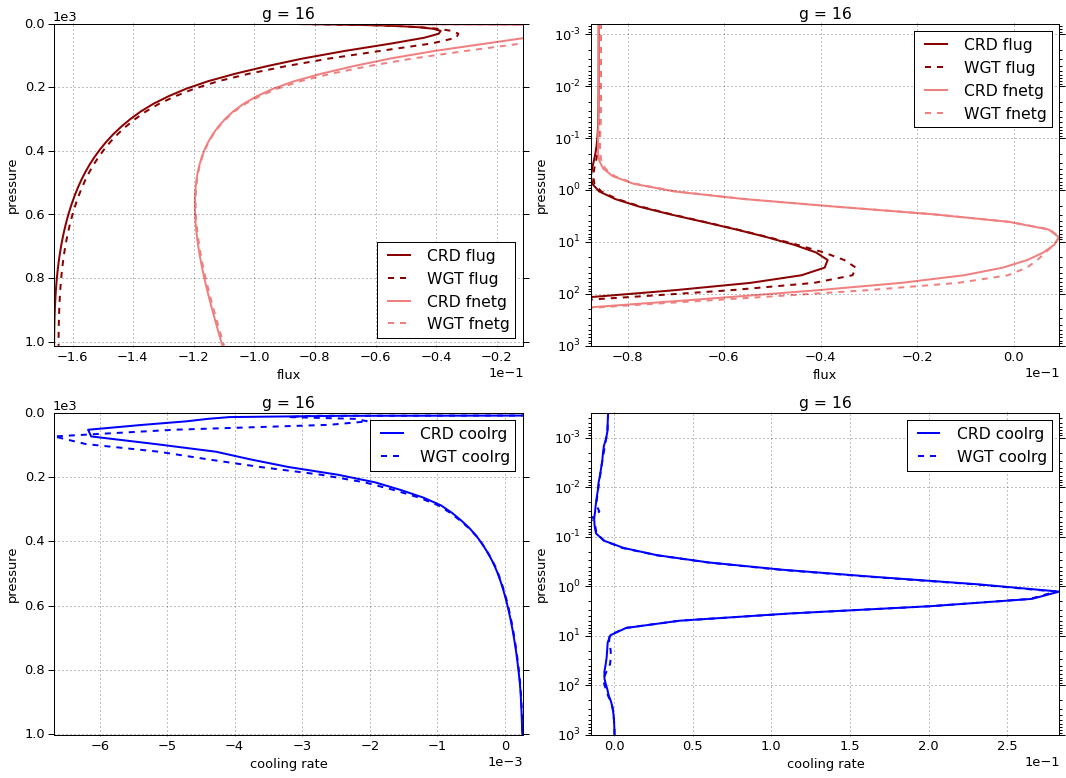

# Figure: flux, cooling rate. g-group 17

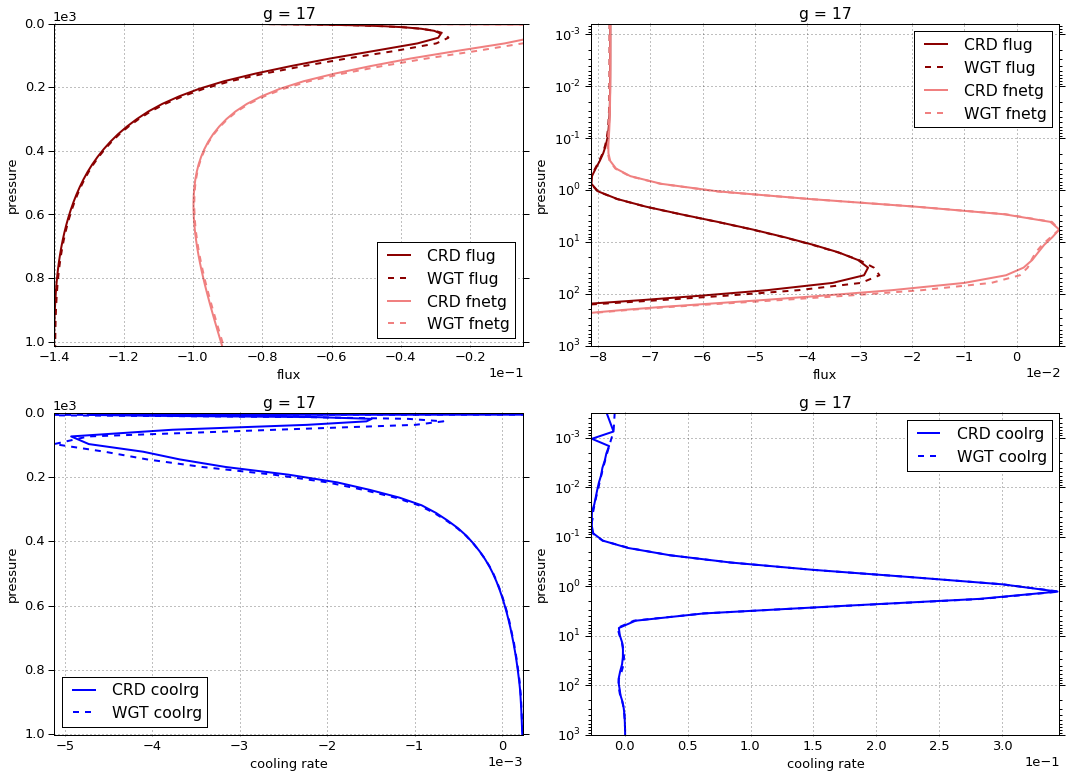

# Figure: flux, cooling rate. g-group 18

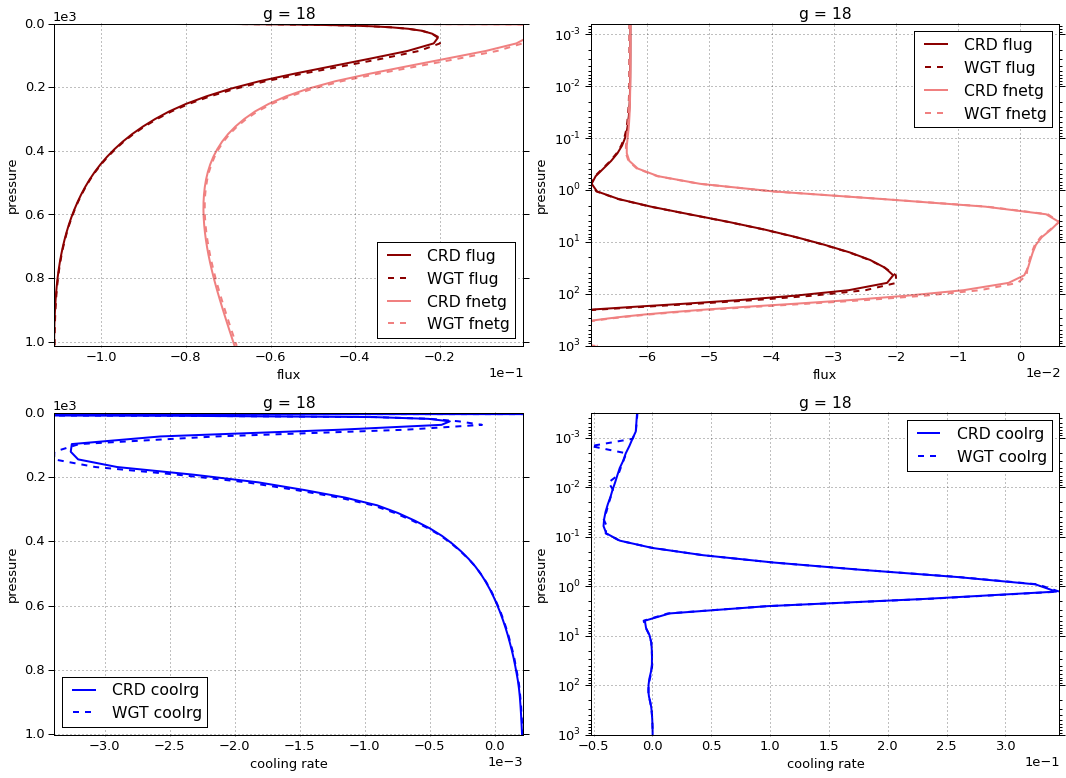

# Figure: flux, cooling rate. g-group 19

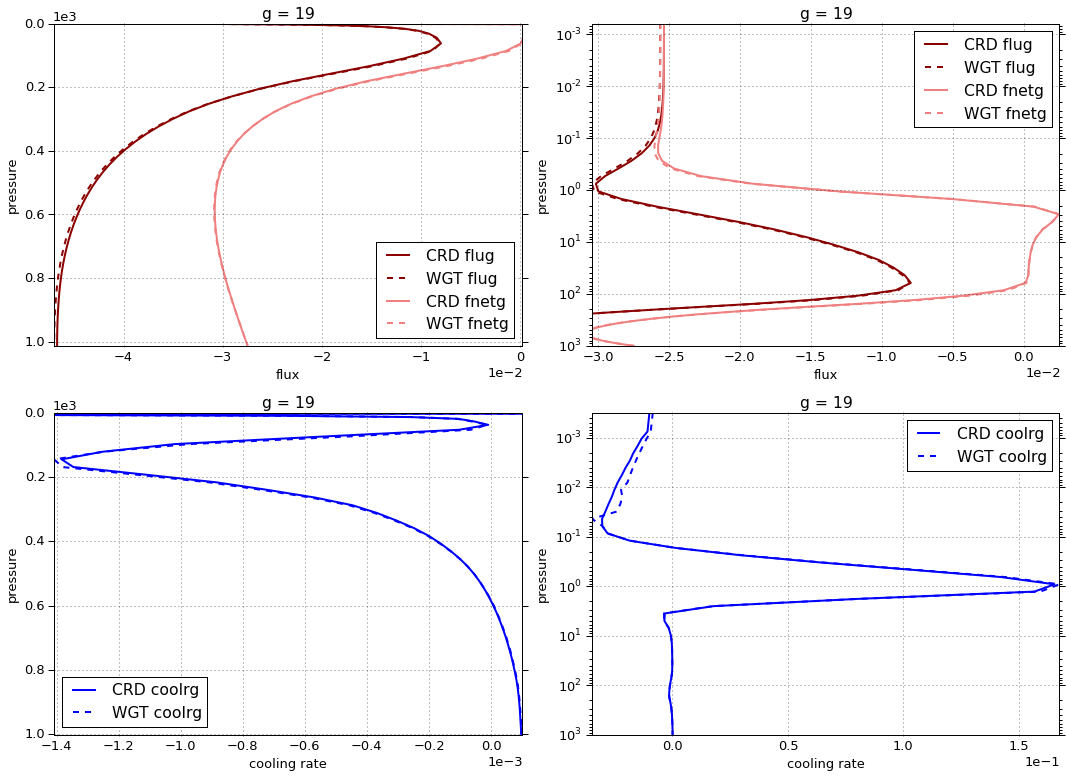

# Figure: flux, cooling rate. g-group 20

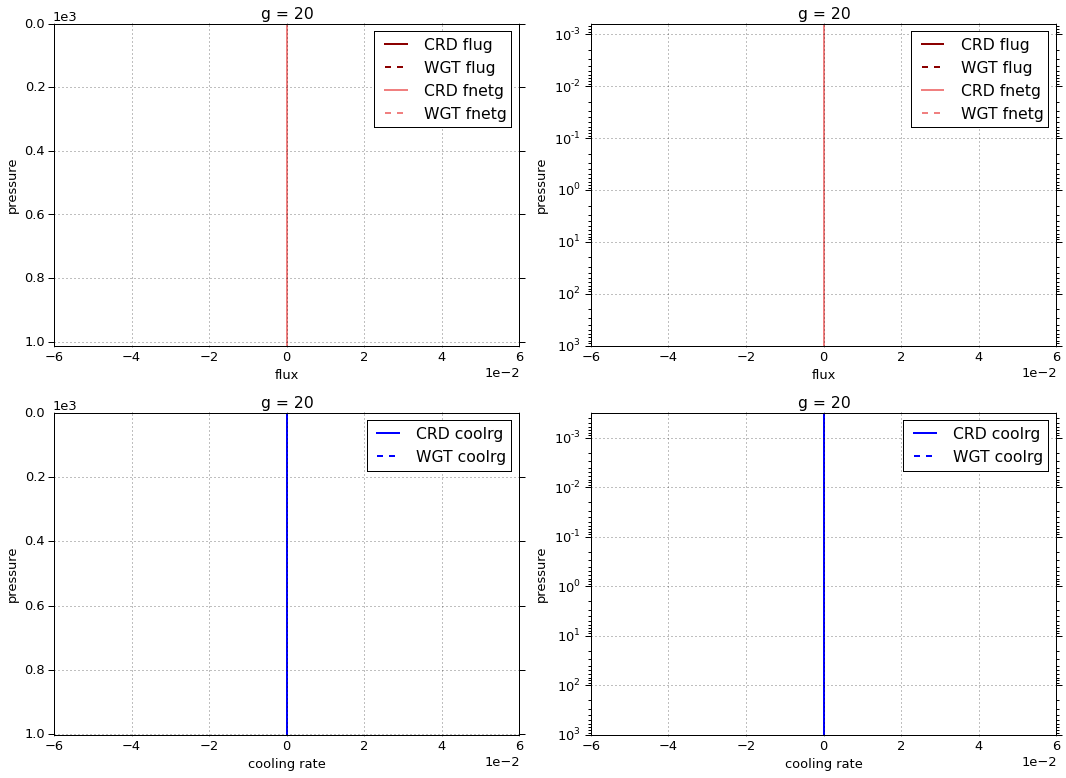

# Figure: flux, cooling rate. g-group total

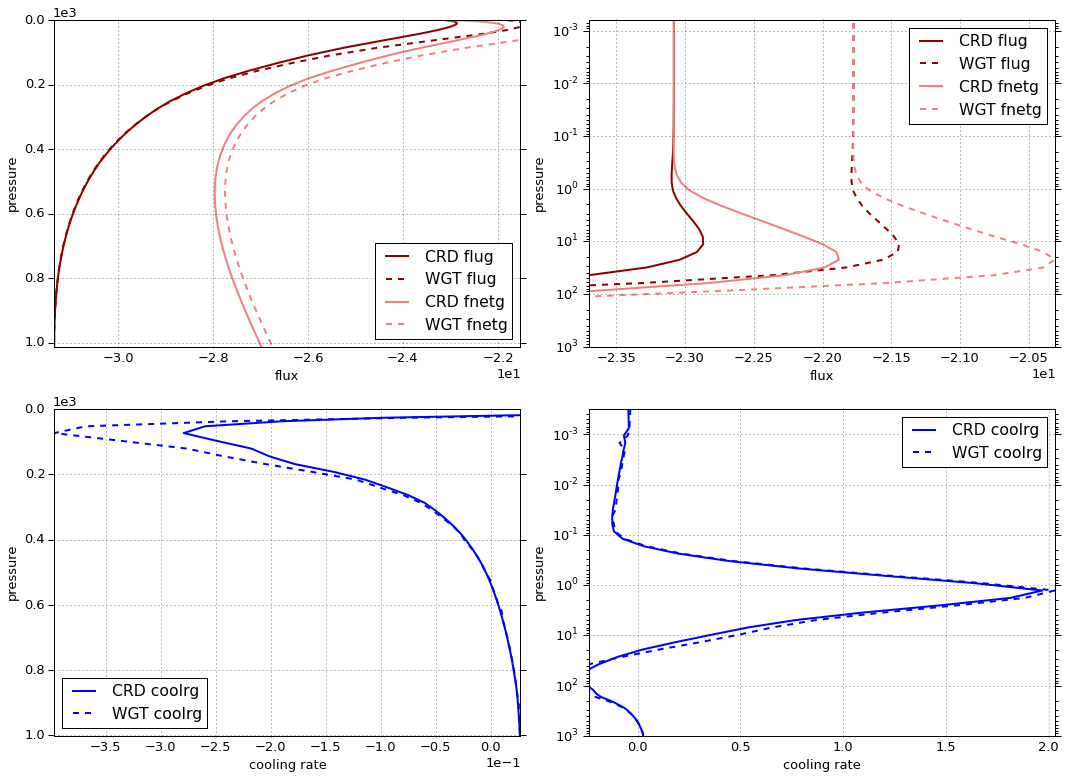

In [13]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [14]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g  pressure level                                
1  0        1     -11.896454  0.000000 -11.896454
   1013     76    -12.267642  0.213648 -12.053994
2  0        1      -1.217671  0.000000  -1.217671
   1013     76     -1.382239  0.095545  -1.286694
3  0        1      -1.241295  0.000000  -1.241295
   1013     76     -1.494905  0.148351  -1.346555
4  0        1      -1.210105  0.000000  -1.210105
   1013     76     -1.573657  0.208725  -1.364932
5  0        1      -1.048964  0.000000  -1.048964
   1013     76     -1.498735  0.252119  -1.246616
6  0        1      -0.888769  0.000000  -0.888769
   1013     76     -1.408924  0.278594  -1.130330
7  0        1      -2.042760  0.000000  -2.042760
   1013     76     -4.885779  1.409290  -3.476489
8  0        1      -1.028502  0.000000  -1.028502
   1013     76     -1.938598  0.447014  -1.491584
9  0        1      -0.809265  0.000000  -0.809265
   1013     76     -1.505361  0.348715  -1.156646
10 0        1      -0.522405  0.000000  -0.522405
   1013     76     -0.994093  0.242018  -0.752075
11 0        1      -0.367579  0.000000  -0.367579
   1013     76     -0.725953  0.187952  -0.538001
12 0        1      -0.236391  0.000000  -0.236391
   1013     76     -0.496961  0.138321  -0.358640
13 0        1      -0.135858  0.000000  -0.135858
   1013     76     -0.312384  0.098955  -0.213429
14 0        1      -0.104337  0.000000  -0.104337
   1013     76     -0.238052  0.076815  -0.161237
15 0        1      -0.078761  0.000000  -0.078761
   1013     76     -0.166891  0.055697  -0.111194
16 0        1      -0.085966  0.000000  -0.085966
   1013     76     -0.166064  0.055519  -0.110545
17 0        1      -0.077680  0.000000  -0.077680
   1013     76     -0.140109  0.048508  -0.091601
18 0        1      -0.062718  0.000000  -0.062718
   1013     76     -0.111153  0.042643  -0.068510
19 0        1      -0.025359  0.000000  -0.025359
   1013     76     -0.046734  0.019236  -0.027498
20 0        1       0.000000  0.000000   0.000000
   1013     76      0.000000  0.000000   0.000000


WGT


flug      fldg      fnetg
g  pressure level                                
1  0        1     -12.099011  0.000000 -12.099011
   1013     76    -12.482905  0.216795 -12.266109
2  0        1      -1.190486  0.000000  -1.190486
   1013     76     -1.354764  0.094486  -1.260278
3  0        1      -1.211694  0.000000  -1.211694
   1013     76     -1.465810  0.147838  -1.317973
4  0        1      -1.185699  0.000000  -1.185699
   1013     76     -1.552035  0.210113  -1.341921
5  0        1      -1.019074  0.000000  -1.019074
   1013     76     -1.471036  0.252692  -1.218344
6  0        1      -0.862798  0.000000  -0.862798
   1013     76     -1.387425  0.280532  -1.106892
7  0        1      -1.774698  0.000000  -1.774698
   1013     76     -4.869051  1.485214  -3.383838
8  0        1      -0.694962  0.000000  -0.694962
   1013     76     -1.912608  0.500564  -1.412044
9  0        1      -0.496978  0.000000  -0.496978
   1013     76     -1.484100  0.396689  -1.087412
10 0        1      -0.305452  0.000000  -0.305452
   1013     76     -0.985046  0.274301  -0.710744
11 0        1      -0.226737  0.000000  -0.226737
   1013     76     -0.722454  0.206061  -0.516392
12 0        1      -0.165621  0.000000  -0.165621
   1013     76     -0.493829  0.143003  -0.350827
13 0        1      -0.113975  0.000000  -0.113975
   1013     76     -0.308317  0.097049  -0.211267
14 0        1      -0.098457  0.000000  -0.098457
   1013     76     -0.236463  0.074123  -0.162340
15 0        1      -0.078206  0.000000  -0.078206
   1013     76     -0.165916  0.054338  -0.111578
16 0        1      -0.085531  0.000000  -0.085531
   1013     76     -0.164610  0.054605  -0.110005
17 0        1      -0.077807  0.000000  -0.077807
   1013     76     -0.139788  0.048620  -0.091167
18 0        1      -0.062857  0.000000  -0.062857
   1013     76     -0.111046  0.043047  -0.067999
19 0        1      -0.025624  0.000000  -0.025624
   1013     76     -0.047031  0.019547  -0.027484
20 0        1       0.000000  0.000000   0.000000
   1013     76      0.000000  0.000000   0.000000


WGT - CRD


flug      fldg     fnetg
g  pressure level                              
1  0        1     -0.202557  0.000000 -0.202557
   1013     76    -0.215263  0.003147 -0.212115
2  0        1      0.027185  0.000000  0.027185
   1013     76     0.027474 -0.001058  0.026416
3  0        1      0.029601  0.000000  0.029601
   1013     76     0.029095 -0.000513  0.028582
4  0        1      0.024406  0.000000  0.024406
   1013     76     0.021622  0.001388  0.023010
5  0        1      0.029890  0.000000  0.029890
   1013     76     0.027699  0.000573  0.028272
6  0        1      0.025971  0.000000  0.025971
   1013     76     0.021499  0.001938  0.023437
7  0        1      0.268062  0.000000  0.268062
   1013     76     0.016728  0.075924  0.092652
8  0        1      0.333539  0.000000  0.333539
   1013     76     0.025990  0.053550  0.079540
9  0        1      0.312287  0.000000  0.312287
   1013     76     0.021260  0.047974  0.069234
10 0        1      0.216953  0.000000  0.216953
   1013     76     0.009048  0.032284  0.041331
11 0        1      0.140842  0.000000  0.140842
   1013     76     0.003499  0.018109  0.021608
12 0        1      0.070770  0.000000  0.070770
   1013     76     0.003132  0.004681  0.007814
13 0        1      0.021883  0.000000  0.021883
   1013     76     0.004067 -0.001905  0.002162
14 0        1      0.005881  0.000000  0.005881
   1013     76     0.001589 -0.002692 -0.001103
15 0        1      0.000556  0.000000  0.000556
   1013     76     0.000975 -0.001359 -0.000384
16 0        1      0.000435  0.000000  0.000435
   1013     76     0.001455 -0.000914  0.000541
17 0        1     -0.000127  0.000000 -0.000127
   1013     76     0.000321  0.000112  0.000433
18 0        1     -0.000139  0.000000 -0.000139
   1013     76     0.000107  0.000404  0.000511
19 0        1     -0.000265  0.000000 -0.000265
   1013     76    -0.000297  0.000311  0.000014
20 0        1      0.000000  0.000000  0.000000
   1013     76     0.000000  0.000000  0.000000

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer          
1  0.000312    1     -0.000085
   1001.112500 75     0.001920
2  0.000312    1     -0.000013
   1001.112500 75     0.000819
3  0.000312    1     -0.000014
   1001.112500 75     0.001256
4  0.000312    1     -0.000012
   1001.112500 75     0.001694
5  0.000312    1     -0.000011
   1001.112500 75     0.001908
6  0.000312    1     -0.000009
   1001.112500 75     0.001946
7  0.000312    1     -0.000009
   1001.112500 75     0.008171
8  0.000312    1     -0.000131
   1001.112500 75     0.002407
9  0.000312    1     -0.000215
   1001.112500 75     0.001817
10 0.000312    1     -0.000244
   1001.112500 75     0.001212
11 0.000312    1     -0.000355
   1001.112500 75     0.000879
12 0.000312    1     -0.000387
   1001.112500 75     0.000604
13 0.000312    1     -0.000432
   1001.112500 75     0.000435
14 0.000312    1     -0.000797
   1001.112500 75     0.000332
15 0.000312    1     -0.001588
   1001.112500 75     0.000252
16 0.000312    1     -0.003840
   1001.112500 75     0.000257
17 0.000312    1     -0.014569
   1001.112500 75     0.000233
18 0.000312    1     -0.013012
   1001.112500 75     0.000210
19 0.000312    1     -0.009928
   1001.112500 75     0.000096
20 0.000312    1      0.000000
   1001.112500 75     0.000000


WGT


coolrg
g  pressure    layer          
1  0.000312    1     -0.000086
   1001.112500 75     0.001945
2  0.000312    1     -0.000013
   1001.112500 75     0.000819
3  0.000312    1     -0.000014
   1001.112500 75     0.001283
4  0.000312    1     -0.000012
   1001.112500 75     0.001732
5  0.000312    1     -0.000011
   1001.112500 75     0.001943
6  0.000312    1     -0.000009
   1001.112500 75     0.001980
7  0.000312    1     -0.000005
   1001.112500 75     0.008407
8  0.000312    1     -0.000023
   1001.112500 75     0.002333
9  0.000312    1     -0.000029
   1001.112500 75     0.001751
10 0.000312    1     -0.000036
   1001.112500 75     0.001167
11 0.000312    1     -0.000073
   1001.112500 75     0.000847
12 0.000312    1     -0.000168
   1001.112500 75     0.000592
13 0.000312    1     -0.000327
   1001.112500 75     0.000440
14 0.000312    1     -0.000742
   1001.112500 75     0.000337
15 0.000312    1     -0.001564
   1001.112500 75     0.000258
16 0.000312    1     -0.003800
   1001.112500 75     0.000260
17 0.000312    1     -0.008061
   1001.112500 75     0.000236
18 0.000312    1     -0.012649
   1001.112500 75     0.000214
19 0.000312    1     -0.008470
   1001.112500 75     0.000098
20 0.000312    1      0.000000
   1001.112500 75     0.000000


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1     -9.201130e-07
   1001.112500 75     2.494270e-05
2  0.000312    1      1.106460e-07
   1001.112500 75    -2.229300e-07
3  0.000312    1      2.576680e-07
   1001.112500 75     2.699800e-05
4  0.000312    1      2.413580e-07
   1001.112500 75     3.823430e-05
5  0.000312    1      5.805220e-07
   1001.112500 75     3.474280e-05
6  0.000312    1      2.200824e-07
   1001.112500 75     3.403960e-05
7  0.000312    1      4.621977e-06
   1001.112500 75     2.358502e-04
8  0.000312    1      1.081322e-04
   1001.112500 75    -7.485620e-05
9  0.000312    1      1.860603e-04
   1001.112500 75    -6.612920e-05
10 0.000312    1      2.080151e-04
   1001.112500 75    -4.488400e-05
11 0.000312    1      2.816822e-04
   1001.112500 75    -3.240622e-05
12 0.000312    1      2.193861e-04
   1001.112500 75    -1.224563e-05
13 0.000312    1      1.046255e-04
   1001.112500 75     5.332690e-06
14 0.000312    1      5.415283e-05
   1001.112500 75     4.942920e-06
15 0.000312    1      2.419740e-05
   1001.112500 75     5.556250e-06
16 0.000312    1      3.956040e-05
   1001.112500 75     3.374790e-06
17 0.000312    1      6.507551e-03
   1001.112500 75     3.322860e-06
18 0.000312    1      3.639690e-04
   1001.112500 75     3.755030e-06
19 0.000312    1      1.457603e-03
   1001.112500 75     1.271115e-06
20 0.000312    1      0.000000e+00
   1001.112500 75     0.000000e+00

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-23.080840,0.000000,-23.080840
1013,76,-31.354236,4.367664,-26.986572



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-21.775667,0.000000,-21.775667
1013,76,-31.354235,4.599619,-26.754616



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,1.305174e+00,0.000000,1.305174
1013,76,3.940000e-07,0.231955,0.231956


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.045653
1001.112500,75,0.026448



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.036093
1001.112500,75,0.026640



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.009560
1001.112500,75,0.000192


In [15]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.398125,0.389033
2,0.043208,0.044447
3,0.046750,0.048037
4,0.049500,0.050431
5,0.046917,0.048112
6,0.044250,0.045164
7,0.155292,0.155815
8,0.061000,0.062120
9,0.047333,0.048253


In [16]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')